# 13.5.4 Dropout

**Dropout:** $\;$ apagado aleatorio de cada neurona con probabilidad $p$

**Ejemplo:** $\;$ MLP de 2 capas y dropout con probabilidad 0.5

<div align="center">
<table><tr><td style="border: none;"><img src="Figure_13.21_A.png" width="250"/></td><td style="border: none;"><img src="Figure_13.21_B.png" width="250"/></td></tr></table>
</div>

**Efectividad y popularidad para evitar sobre-entrenamiento:** $\;$ dropout es una técnica muy efectiva y popular para evitar sobre-entrenamiento; intuitivamente, evita la co-adaptación compleja de unidades ocultas, esto es, cada unidad debe aprender a rendir bien incluso si otras unidades se apagan aleatoriamente

**Dropout como estimador de pesos ruidosos:** $\;\theta_{lij}=w_{lij}\epsilon_{li}\,$ donde $\,\epsilon_{li}\sim\operatorname{Ber}(1-p)$ es el término de ruido
* Si muestreamos $\epsilon_{li}=0$, todos los pesos que salen de la unidad $i$ en la capa $l-1$ hacia cualquier $j$ en la $l$ se fijan a $0$
* En test no suele usarse ruido, pero debería usarse $w_{lij}=\theta_{lij}\mathbb{E}[\epsilon_{li}]$ por consistencia con el entrenamiento; $\mathbb{E}[\epsilon]=1-p$ con Bernoulli

**Dropout en test:** $\;$ resulta un ensamble de redes conocido como **Monte Carlo dropout**
$$p(\boldsymbol{y}\mid\boldsymbol{x},\mathcal{D})\approx\frac{1}{S}\sum\nolimits_{s=1}^Sp(\boldsymbol{y}\mid\boldsymbol{x},\hat{\mathbf{W}}\epsilon^s+\hat{\boldsymbol{b}})$$
donde $S$ es el número de muestras y $\hat{\mathbf{W}}\epsilon^s$ indica que multiplicamos las matrices de pesos estimadas por un vector ruido muestreado

**Ejemplo:** $\;$ MNIST con terminación temprana (paciencia 2) y dropout ($p=0.1$)

In [3]:
import numpy as np; import matplotlib.pyplot as plt
import tensorflow as tf; from tensorflow import keras; import tensorflow_datasets as tfds
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=True)
def normalize_img(image, label): return tf.cast(image, tf.float32) / 255., label
X_train = ds_train.map(normalize_img).batch(128)
X_test = ds_test.map(normalize_img).batch(128)
L0 = keras.layers.Flatten(input_shape=(28, 28))
L1 = keras.layers.Dense(128, activation='relu')
L1_dropout = keras.layers.Dropout(.1)
L2 = keras.layers.Dense(10)
M = keras.models.Sequential([L0, L1, L1_dropout, L2])
optimizer = tf.keras.optimizers.Adam(0.001)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [keras.metrics.SparseCategoricalAccuracy()]
M.compile(optimizer=optimizer, loss=loss, metrics=metrics)
EarlyStopping_cb = keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=2)
H = M.fit(X_train, epochs=100, validation_data=X_test, verbose=0, callbacks=[EarlyStopping_cb])

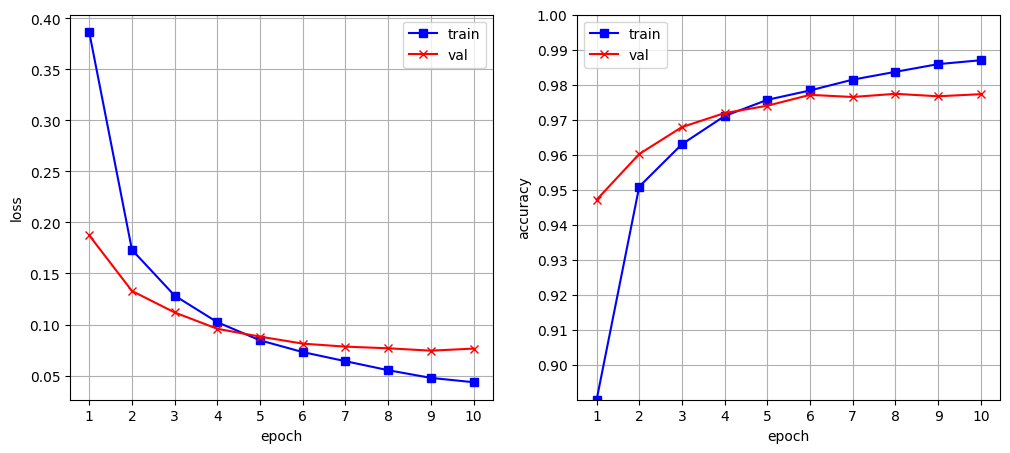

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss'); ax.set_xticks(xx)
ax.plot(xx, H.history['loss'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_loss'], color='r', marker='x', label='val'); ax.legend()
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xx); ax.set_yticks(np.arange(.9, 1.01, .01)); ax.set_ylim([.89, 1.])
ax.plot(xx, H.history['sparse_categorical_accuracy'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_sparse_categorical_accuracy'], color='r', marker='x', label='val'); ax.legend();